In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/sample_def.pkl')
data.head()

,OBJID,RA,DEC,CAT,coord,image
0,587729752748589500,17:10:08.28,+30:49:53.1,ELLIPTICAL,257d32m04.2s 30d49m53.1s,"[[1097.0, 1111.0, 1111.0, 1111.0, 1103.0, 1107..."
1,587735348015989105,08:52:39.80,+08:58:48.5,ELLIPTICAL,133d09m57s 8d58m48.5s,"[[1127.0, 1119.0, 1119.0, 1119.0, 1120.0, 1120..."
2,587741602567356591,12:03:15.59,+28:01:53.5,SPIRAL,180d48m53.85s 28d01m53.5s,"[[1121.0, 1114.0, 1114.0, 1114.0, 1126.0, 1126..."
3,588017702928842825,11:44:37.72,+11:49:21.3,SPIRAL,176d09m25.8s 11d49m21.3s,"[[1128.0, 1128.0, 1137.0, 1137.0, 1137.0, 1150..."
4,587739114697523491,07:57:06.00,+17:12:32.8,SPIRAL,119d16m30s 17d12m32.8s,"[[1197.0, 1197.0, 1176.0, 1176.0, 1211.0, 1211..."


In [ ]:
data

,OBJID,RA,DEC,CAT,coord,image
0,587729752748589500,17:10:08.28,+30:49:53.1,ELLIPTICAL,257d32m04.2s 30d49m53.1s,"[[1097.0, 1111.0, 1111.0, 1111.0, 1103.0, 1107..."
1,587735348015989105,08:52:39.80,+08:58:48.5,ELLIPTICAL,133d09m57s 8d58m48.5s,"[[1127.0, 1119.0, 1119.0, 1119.0, 1120.0, 1120..."
2,587741602567356591,12:03:15.59,+28:01:53.5,SPIRAL,180d48m53.85s 28d01m53.5s,"[[1121.0, 1114.0, 1114.0, 1114.0, 1126.0, 1126..."
3,588017702928842825,11:44:37.72,+11:49:21.3,SPIRAL,176d09m25.8s 11d49m21.3s,"[[1128.0, 1128.0, 1137.0, 1137.0, 1137.0, 1150..."
4,587739114697523491,07:57:06.00,+17:12:32.8,SPIRAL,119d16m30s 17d12m32.8s,"[[1197.0, 1197.0, 1176.0, 1176.0, 1211.0, 1211..."
...,...,...,...,...,...,...
33295,588017992310522194,15:11:41.37,+08:07:11.6,SPIRAL,227d55m20.55s 8d07m11.6s,"[[1131.0, 1131.0, 1122.0, 1122.0, 1122.0, 1128..."
33296,588016839633207353,08:09:19.25,+21:58:44.2,UNCERTAIN,122d19m48.75s 21d58m44.2s,"[[1114.0, 1114.0, 1114.0, 1111.0, 1111.0, 1111..."
33297,587730023328448735,14:38:28.76,+06:40:41.4,SPIRAL,219d37m11.4s 6d40m41.4s,"[[1135.0, 1135.0, 1135.0, 1122.0, 1122.0, 1122..."
33298,587730021714952401,14:11:34.85,+05:48:00.6,SPIRAL,212d53m42.75s 5d48m00.6s,"[[1164.0, 1164.0, 1155.0, 1155.0, 1155.0, 1155..."


'SPIRAL'

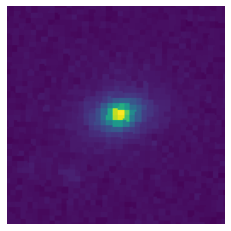

In [ ]:
plt.imshow(data['image'][18276])
plt.axis('off')
data['CAT'][29711]

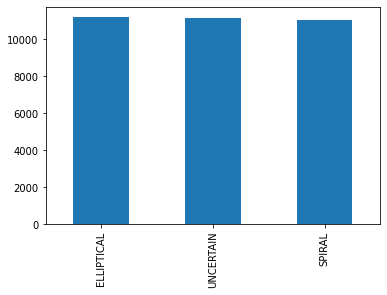

In [ ]:
data['CAT'].value_counts().plot.bar()

In [ ]:
def normal(img):
  norm = (img - np.min(img)) / (np.max(img) - np.min(img))
  return norm


data['image']=data['image'].apply(normal)

(-0.5, 127.5, 127.5, -0.5)

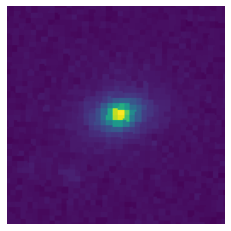

In [ ]:
plt.imshow(data['image'][18276])
plt.axis('off')

In [ ]:
norma=np.array(data['image'])

for i in range(len(norma)):
  norma[i]=norma[i][29:99,29:99]
  norma[i]=np.asarray(norma[i],dtype=np.float64)

In [ ]:
dm=np.empty((len(data),70,70,1))

for i in range(len(norma)):
  dm[i,:,:,0]=norma[i]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y_le=le.fit_transform(data['CAT'])

X_train,X_test,y_train,y_test=train_test_split(dm,y_le,random_state=42)

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.asarray(y_train,dtype=np.float64)
y_test=np.asarray(y_test,dtype=np.float64)

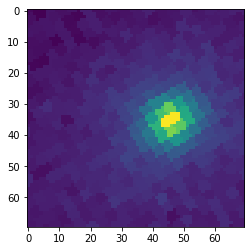

In [ ]:
plt.imshow(X_train[1081,:,:,0])

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 12544)             0

In [ ]:
import os
checkpoint_path = "training-o/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),callbacks=cp_callback)

Epoch 1/10
781/781 [==============================] - ETA: 0s - loss: 0.9808 - accuracy: 0.5035
Epoch 1: saving model to training-o/cp-0001.ckpt
781/781 [==============================] - 17s 10ms/step - loss: 0.9808 - accuracy: 0.5035 - val_loss: 0.9245 - val_accuracy: 0.5225
Epoch 2/10
781/781 [==============================] - ETA: 0s - loss: 0.8810 - accuracy: 0.5561
Epoch 2: saving model to training-o/cp-0002.ckpt
781/781 [==============================] - 7s 9ms/step - loss: 0.8810 - accuracy: 0.5561 - val_loss: 0.8556 - val_accuracy: 0.5750
Epoch 3/10
774/781 [============================>.] - ETA: 0s - loss: 0.8195 - accuracy: 0.5952
Epoch 3: saving model to training-o/cp-0003.ckpt
781/781 [==============================] - 6s 8ms/step - loss: 0.8196 - accuracy: 0.5953 - val_loss: 0.8577 - val_accuracy: 0.5796
Epoch 4/10
780/781 [============================>.] - ETA: 0s - loss: 0.7930 - accuracy: 0.6143
Epoch 4: saving model to training-o/cp-0004.ckpt
781/781 [================

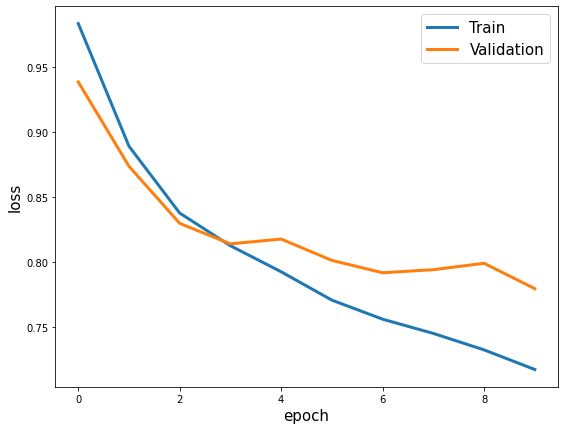

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.plot(history.history['loss'], label="Train", lw=3)
ax.plot(history.history['val_loss'], label="Validation", lw=3)
ax.set_xlabel('epoch',fontsize=15)
ax.set_ylabel('loss',fontsize=15)
ax.legend(fontsize=15);

In [ ]:
print("Loading model %i" % (np.argmin(history.history["val_loss"]) + 1))
model.load_weights('%s/cp-%04d.ckpt' % (checkpoint_dir, np.argmin(history.history["val_loss"]) + 1))

Loading model 8


In [ ]:
predictions = model.predict(X_test)

261/261 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=12)
    plt.yticks(tick_marks, classes, size=12)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j],3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", size=15)

    plt.tight_layout()
    plt.ylabel('True label', size=15)
    plt.xlabel('Predicted label', size=15)

Normalized confusion matrix


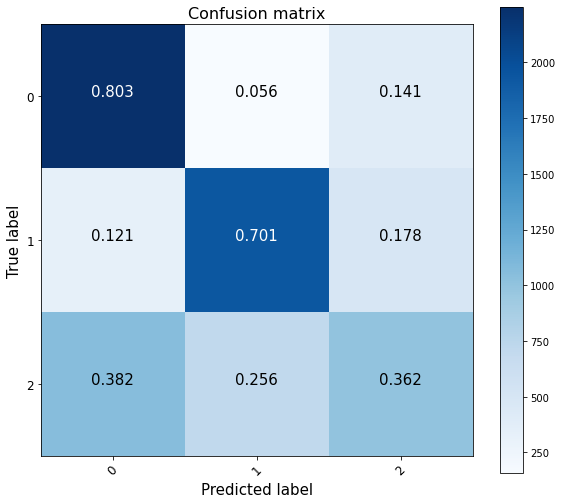

In [ ]:
plt.figure(figsize=(8,7))
plot_confusion_matrix(confusion_matrix(y_test, np.argmax(predictions, axis=1)), range(3),normalize=True)
plt.show()

In [ ]:
clases=np.unique(data['CAT'])

l2n = dict(zip(range(len(clases)), clases))

msc=[]   #msc tiene los indices de y_test clasificados erroneamente

for i in range(len(y_test)):
  if y_test[i]!=np.argmax(predictions[i]): msc.append(i)

ell_m=[]         #se separan las misclassifications por categoria
spi_m=[]
unc_m=[]


for i in range(len(msc)):
  if l2n[y_test[msc[i]]]=='ELLIPTICAL':
    ell_m.append(msc[i])
  if l2n[y_test[msc[i]]]=='SPIRAL':
    spi_m.append(msc[i])
  if l2n[y_test[msc[i]]]=='UNCERTAIN':
    unc_m.append(msc[i])

clases_mis=np.array([ell_m,spi_m,unc_m])

<ipython-input-13-80dbaa082313>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clases_mis=np.array([ell_m,spi_m,unc_m])


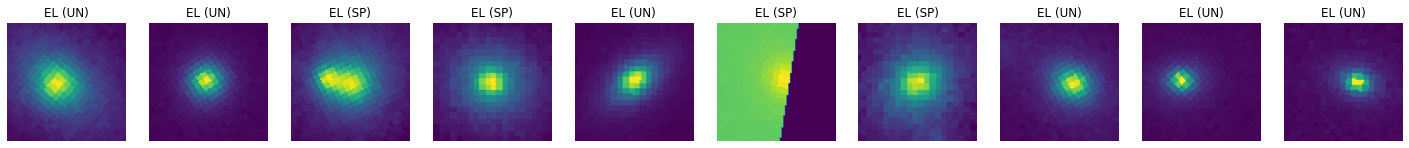

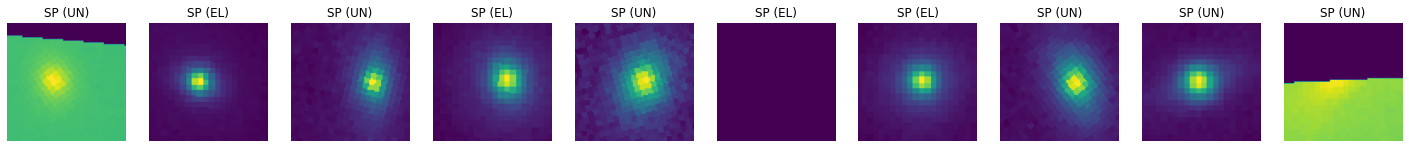

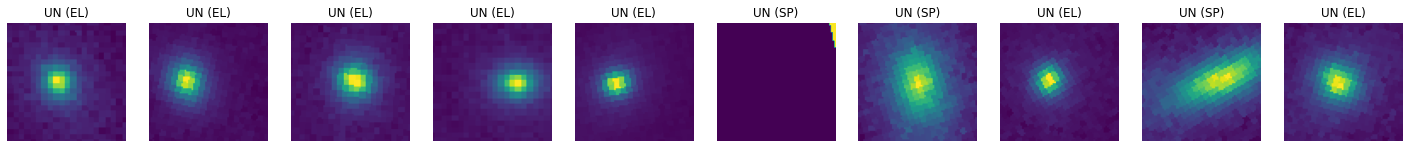

In [ ]:
def plot_ms(clase):
  rnd_10=np.random.choice(clase,10)
  fig,ax=plt.subplots(1,10,figsize=(25,25))
  #fig.suptitle(np.array(clase['class'])[0],y=0.55)
  for i in range(10):
      ax[i].imshow(X_test[rnd_10[i],:,:,0])
      ax[i].axis(False)
      ax[i].set_title('%s (%s)' % (l2n[y_test[rnd_10[i]]][:2],l2n[np.argmax(predictions[rnd_10[i]])][:2]))    #real(prediction)

for clase in clases_mis:
  plot_ms(clase)